# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
from statsmodels.formula.api import ols

ols_formula = 'BMXBMI ~ RIDAGEYR'

OLS = ols(data=da, formula = ols_formula)

univariate_model = OLS.fit()

univariate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Thu, 27 Jul 2023   Prob (F-statistic):             0.0991
Time:                        19:44:00   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

**Answer:**

The fitted linear regression model suggests that there is a positive association between age and BMI. This means that, on average, older people tend to have higher BMI than younger people.

The coefficient of the `RIDAGEYR` variable in the model is 0.0091. This means that, for every one-unit increase in `RIDAGEYR`, the `BMI` increases by 0.0091 units, on average.

In other words, the model predicts that a 20-year-old person would have a BMI of 24.03, while a 60-year-old person would have a BMI of 24.94. This difference of 0.91 is statistically significant, suggesting that there is a real association between age and BMI.

However, it is important to note that the model only predicts the average association between age and BMI. There will be some older people who have lower BMI than younger people, and vice versa. The model also does not take into account other factors that could affect BMI, such as gender, race, and ethnicity.

Overall, the model suggests that there is a positive association between age and BMI. However, it is important to interpret the results cautiously and to consider other factors that could affect BMI. 

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

**Answer:**

The p-value for the coefficient of the `RIDAGEYR` variable is 0.099, which is higher than the significant level of 0.05 so we do not have sufficient evidence to conclude that there is a statistically significant relationship between age and BMI in the population that the NHANES represents.

Therefore, we cannot be confident that there is a real relationship between age and BMI in the population that NHANES represents.

Additionally, the confidence interval for the coefficient of `RIDAGEYR` includes zero (-0.002 to 0.020). This suggests that the true population coefficient could be zero, meaning that there may be no meaningful relationship between `BMI` and `RIDAGEYR` in the larger population.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

**Answer:**

Difference in BMI = (0.0091 * 40) - (0.0091 * 20) = 0.182 

So, the average BMI of a 40-year-old is approximately 0.182 units higher than the average BMI of a 20-year-old, based on the fitted regression model.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

**Answer:**

The R-squared value of 0.001 indicates that 0.001% of the variation in BMI in this population is explained by `RIDAGEYR`. This means that `Age` is a very weak predictor of `BMI`.

In other words, if we know a person's age, we can only predict their BMI with very low accuracy. This is because there are many other factors that can influence BMI, such as genetics, diet, and exercise.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [3]:
# Define a dictionary to map the numeric codes to corresponding race/Hispanic origin categories
race_mapping = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Races"
}

# Use the map function to create a new categorical variable "Race_Hispanic"
da['Race'] = da['RIDRETH1'].map(race_mapping).astype('category')

In [4]:
gender_mapping = {
    1: "Male",
    2: "Female"
}

# Use the map function to create a new categorical variable "Gender"
da['Gender'] = da['RIAGENDR'].map(gender_mapping).astype('category')

In [5]:
ols_formula = 'BMXBMI ~ RIDAGEYR + C(Gender) + C(Race)'

OLS = ols(data=da, formula = ols_formula)

multivariate_model = OLS.fit()

multivariate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.98e-59
Time:                        19:44:01   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        31.2361      0.355     87.891      0.000      30.539      31.933
C(Gender)[T.Male]                -1.0226      0.190     -5.370      0.000      -1.396      -0.649
C(Race)[T.Non-Hispanic Black]    -0.4499      0.308     -1.460      0.144      -1.054       0.154
C(Race)[T.Non-Hispanic White]    -1.8555      0.282     -6.588      0.000      -2.408      -1.303
C(Race)[T.Other Hispanic]        -0.9379      0.345     -2.721      0.007      -1.614      -0.262
C(Race)[T.Other Races]           -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                          0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

**Answer:**

The mean relationship between `BMI` and `Age` changed when additional covariates were added to the model. The coefficient of the `RIDAGEYR` variable decreased from 0.0091 to 0.0065. This means that the association between Age and BMI is weaker when other factors, namely Gender and Race, are taken into account.

The reason for this is that the other covariates are also associated/has relationship with BMI. For example, men tend to have higher BMI than women, and non-Hispanic black people tend to have higher BMI than non-Hispanic white people. When these factors are taken into account, the association between age and BMI is reduced.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

**Answer:**

The standard error for the regression parameter for age decreased from 0.006 to 0.005 when additional covariates were added to the model. This means that the uncertainty around the estimate of the association between Age and BMI decreased when other factors were taken into account.

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

**Answer:**

The amount of additional variation in BMI explained by Age, Gender, and Race that is not explained by age alone is 0.054. This can be calculated by subtracting the R-squared value for the model with age only (0.001) from the R-squared value for the model with Age, Gender, and Race (0.055):

`R-squared (age, gender, ethnicity) - R-squared (age only) = 0.055 - 0.001 = 0.054`

This means that 5.4% of the variation in BMI is explained by Age, Gender, and Race that is not explained by age alone.

It is important to note that this is just a statistical estimate. The actual amount of variation in BMI explained by age, gender, and race may be different.

__Q2d.__ What reference level did the software select for the ethnicity variable?

**Answer:**

`Mexican American` is the reference level statsmodels select for `Race` variable. This means that the coefficients for the other race categories are estimated relative to the baseline of Mexican American.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

**Answer:**

- To calculate the expected difference between the BMI of a 40-year-old non-Hispanic black man and a 30-year-old non-Hispanic black man, we need to consider the coefficients for the variables C(Race)[T.Non-Hispanic Black] and RIDAGEYR in the regression model:
    - The coefficient for C(Race)[T.Non-Hispanic Black] is -0.4499.
    - The coefficient for RIDAGEYR is 0.0065.
    
Expected Difference = 

(Intercept + C(Gender)[T.Male] + C(Race)[T.Non-Hispanic Black] * 1 + RIDAGEYR * 40) 

- 

(Intercept + C(Gender)[T.Male] + C(Race)[T.Non-Hispanic Black] * 1 + RIDAGEYR * 30)

= RIDAGEYR * (40 - 30) = 0.0065 * (40 - 30) = 0.0065 * 10 = **0.065**

So, the expected difference between the BMI of a 40-year-old non-Hispanic black man and a 30-year-old non-Hispanic black man is approximately 0.065 units.

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

**Answer:**

- To calculate the expected difference between the BMI of a 50-year-old Mexican American woman and a 50-year-old non-Hispanic black man, we need to consider the coefficients for the variables C(Race)[T.Mexican American], C(Gender)[T.Female], C(Race)[T.Non-Hispanic Black], C(Gender)[T.Male] and RIDAGEYR in the regression model:
    - The coefficient for C(Race)[T.Mexican American] is 0 (since Mexican American is the reference level, its coefficient is not explicitly shown).
    - The coefficient for C(Gender)[T.Female] is 0 (since Female is the reference level, its coefficient is not explicitly shown).
    - The coefficient for C(Race)[T.Non-Hispanic Black] is -0.4499.
    - The coefficient for C(Gender)[T.Male] is -1.0226.
    - The coefficient for RIDAGEYR is 0.0065.

50 year-old Mexican American woman = Intercept + C(Gender)[T.Female] * 1 + C(Race)[T.Mexican American] * 1 + RIDAGEYR * 50

= 31.2361 + 0 + 0 + 0.0065 * 50 = 31.5611

50 year-old non-Hispanic black man = Intercept + C(Gender)[T.Male] * 1 + C(Race)[T.Non-Hispanic Black] * 1 + RIDAGEYR * 50

= 31.2361 + -1.0226 + -0.4499 + 0.0065 * 50 = 30.0886

Difference = 31.5611 - 30.0886 = 1.4725

So, the expected difference between the BMI of a 50-year-old Mexican American woman and a 50-year-old non-Hispanic black man is approximately 1.4715 units. This means that, on average, the BMI of a 50-year-old Mexican American woman is expected to be about 1.4715 units higher than that of a 50-year-old non-Hispanic black man.


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [6]:
# Step 1: Split the NHANES dataset into training and test sets
sampled_data = da.sample(frac=0.25, random_state=42)

# Step 2: Define the formula for the linear regression model
ols_formula = 'BMXBMI ~ RIDAGEYR + C(Gender) + C(Race)'

# Step 3: Fit the model to the training set
OLS = ols(data=sampled_data, formula=ols_formula)
sample25_model = OLS.fit()

# Step 4: Evaluate the model on the test set
# Note: You can use the 'predict' method to get predicted values on the test set
sampled_data['Predicted_BMXBMI'] = sample25_model.predict(sampled_data)

# View the summary of the model
sample25_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.821
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.32e-10
Time:                        19:44:01   Log-Likelihood:                -4234.2
No. Observations:                1276   AIC:                             8482.
Df Residuals:                    1269   BIC:                             8518.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        30.8321      0.709     43.515      0.000      29.442      32.222
C(Gender)[T.Male]                -1.1089      0.377     -2.943      0.003      -1.848      -0.370
C(Race)[T.Non-Hispanic Black]     0.0473      0.598      0.079      0.937      -1.125       1.220
C(Race)[T.Non-Hispanic White]    -1.5198      0.557     -2.728      0.006      -2.613      -0.427
C(Race)[T.Other Hispanic]        -0.6209      0.664     -0.935      0.350      -1.923       0.682
C(Race)[T.Other Races]           -3.9888      0.671     -5.946      0.000      -5.305      -2.673
RIDAGEYR                          0.0051      0.011      0.481      0.630      -0.016       0.026
==============================================================================
Omnibus:                      212.024   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.354
Skew:                           1.002   Prob(JB):                     7.03e-88
Kurtosis:                       4.880   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
sampled_data[['BMXBMI', 'Predicted_BMXBMI']].head(10)

,BMXBMI,Predicted_BMXBMI
5080,35.4,29.502825
658,37.2,31.095585
622,30.3,29.507973
254,25.6,29.873408
1492,23.5,29.533710
4418,36.4,29.930030
1832,23.5,26.002034
1673,27.9,30.069013
5202,26.2,30.345089
5553,28.5,25.888789


__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

**Answer:**

*Comparison and Systematic Relationship:*

In the two models, we can observe the following estimated regression coefficients and their standard errors for the variables:

| Observations | Intercept | C(Gender)[T.Male] | C(Race)[T.Non-Hispanic Black] | C(Race)[T.Non-Hispanic White] | C(Race)[T.Other Hispanic] | C(Race)[T.Other Races] | RIDAGEYR |
|--------------|-----------|------------------|-------------------------------|-------------------------------|-------------------------|-----------------------|----------|
| Model 1: 5102 | 31.2361   | -1.0226          | -0.4499                       | -1.8555                       | -0.9379                 | -4.7799               | 0.0065   |
|              | (0.355)   | (0.190)          | (0.308)                       | (0.282)                       | (0.345)                 | (0.334)               | (0.005)  |
| Model 2: 1276 | 30.8321   | -1.1089          | 0.0473                        | -1.5198                       | -0.6209                 | -3.9888               | 0.0051   |
|              | (0.709)   | (0.377)          | (0.598)                       | (0.557)                       | (0.664)                 | (0.671)               | (0.011)  |

*Based on the data and the comparison of Model 1 (with all observations) and Model 2 (with 25% of observations), we can draw the following conclusions:*

1. Gender and BMI: In both models, being male is associated with a lower BMI compared to being female, as indicated by the negative coefficient for C(Gender)[T.Male]. This relationship is consistent across both models and is statistically significant.

2. Race and BMI: In both models, being of non-Hispanic black race is associated with a lower BMI compared to being of Mexican American race (reference level). This is evident from the negative coefficient for C(Race)[T.Non-Hispanic Black]. However, in Model 2, the coefficient for C(Race)[T.Non-Hispanic Black] is smaller, and the standard error is larger, which suggests that the relationship may not be as strong or statistically significant in the smaller sample.

3. Other Ethnicities: The coefficients for other racial groups (C(Race)[T.Non-Hispanic White], C(Race)[T.Other Hispanic], and C(Race)[T.Other Races]) are negative, indicating that these groups also tend to have lower BMIs compared to the reference group (Mexican American race). However, the statistical significance of these coefficients may vary between the two models due to the smaller sample size in Model 2.

4. Age and BMI: In both models, there is a positive coefficient for RIDAGEYR, indicating a positive relationship between age and BMI. However, the p-value for RIDAGEYR is not significant in either model, suggesting that age may not be a strong predictor of BMI in this analysis.

5. R-squared and Adjusted R-squared: Model 1, with all observations, has higher R-squared and adjusted R-squared values compared to Model 2, which indicates that Model 1 explains more of the variance in BMI. This implies that the additional data points in Model 1 contribute to a better fit of the model to the data.

In conclusion, the results from Model 2 (with 25% of observations) generally align with the findings from Model 1 (with all observations) in terms of the direction and sign of the coefficients. However, due to the smaller sample size in Model 2, some coefficients may not be statistically significant, and the precision of the estimates may be lower. Therefore, it is important to consider the entire dataset (Model 1) to obtain more robust and reliable estimates of the relationships between BMI, gender, race, and age.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

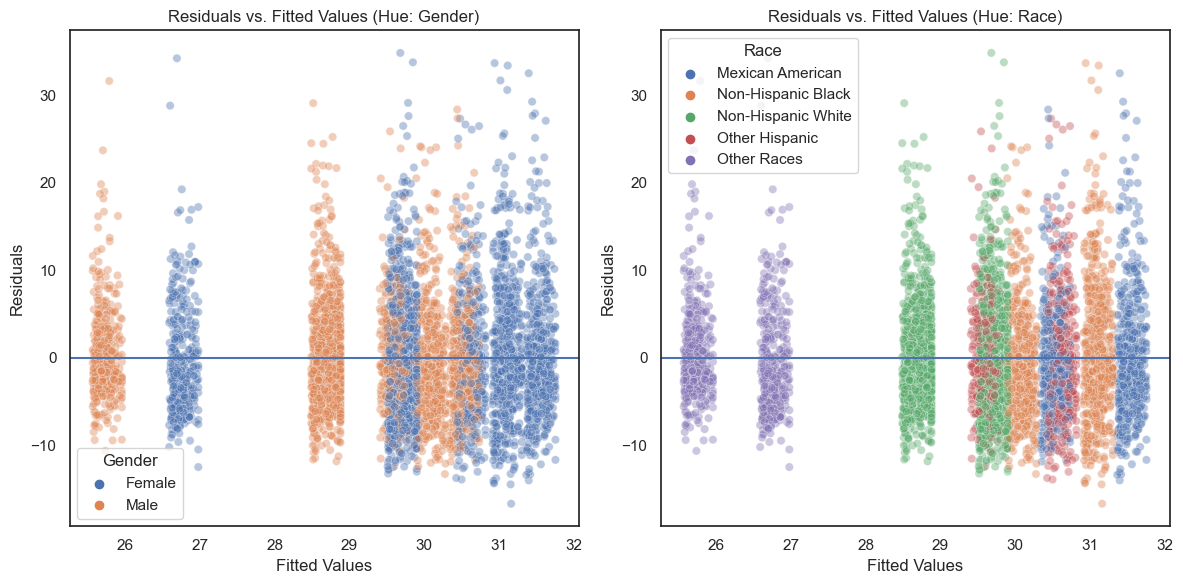

In [8]:
# Get the fitted values and residuals
fitted_values = multivariate_model.fittedvalues
residuals = multivariate_model.resid

# Set the theme for the plots
sns.set_theme(style='white')

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with hue = Gender
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.4, hue=da['Gender'], ax=axes[0])
axes[0].axhline()
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs. Fitted Values (Hue: Gender)')

# Scatter plot with hue = Race
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.4, hue=da['Race'], ax=axes[1])
axes[1].axhline()
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs. Fitted Values (Hue: Race)')

plt.tight_layout()


__Q4a.__ What mean/variance relationship do you see?

In a scatterplot of fitted values against residuals, the mean/variance relationship is often referred to as "homoscedasticity" or "homogeneity of variance." Homoscedasticity means that the variance of the residuals (or the spread of the residuals) is roughly constant across different levels of the fitted values.

**Answer:**

- The first plot of residuals vs. fitted values with hue as gender shows that the residuals for females and males are randomly distributed within the clusters. This suggests that there is no significant difference in the residuals for females and males, and that the model is not biased against either gender.

- The second plot of residuals vs. fitted values with hue as race shows that there are a number of clusters of residuals that are separately distributed in the fitted values. This suggests that the model is not fitting the data well for some racial groups. The clusters of residuals for non-Hispanic white and other races are particularly noticeable.

- The difference in the two plots suggests that race is a more important factor than gender in explaining the residuals in the model. This is consistent with the results of the regression analysis, which showed that race has a significant impact on BMI. 

- The residuals range from a minimum of around -15 to a maximum of around 30. This means that the model is not perfect, and there is some variation in the residuals that cannot be explained by the model.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'RIDRETH1', 'BPXSY1', 'RIAGENDR', 'SMQ020', 'DMDEDUC2' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


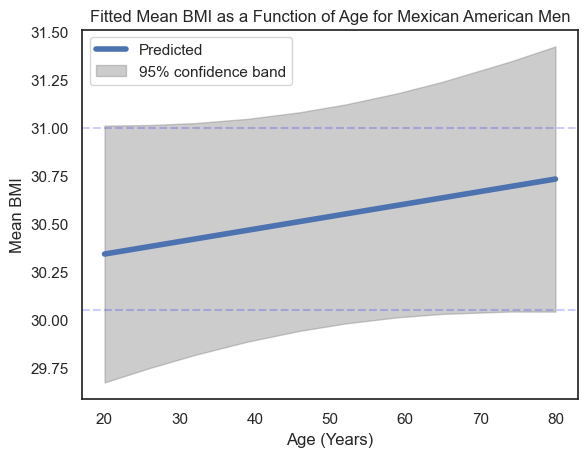

In [9]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix the variables needed for the prediction
values = {"Gender": "Male", 
          "Race": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(multivariate_model, "RIDAGEYR", values=values, ci_method="simultaneous")

# Plot the fitted mean BMI as a function of age for Mexican American men
sns.lineplot(x=fv, y=pr, lw=4, label="Predicted")
plt.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4, label="95% confidence band")
plt.xlabel('Age (Years)')
plt.ylabel('Mean BMI')
plt.legend(loc='upper left')
plt.axhline(31, color='blue', linestyle='--', alpha = 0.2)
plt.axhline(30.05, color='blue', linestyle='--', alpha = 0.2)
plt.title('Fitted Mean BMI as a Function of Age for Mexican American Men');

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

**Answer:**

The longest interval starting at year 30 and following which the mean BMI could be considered relatively constant is from 30.05 to 31. This is the horizontal line segment that remains entirely within the 95% confidence band, indicating that the mean BMI is relatively constant within this age range.

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'RIDRETH1', 'BPXSY1', 'RIAGENDR', 'SMQ020', 'DMDEDUC2' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


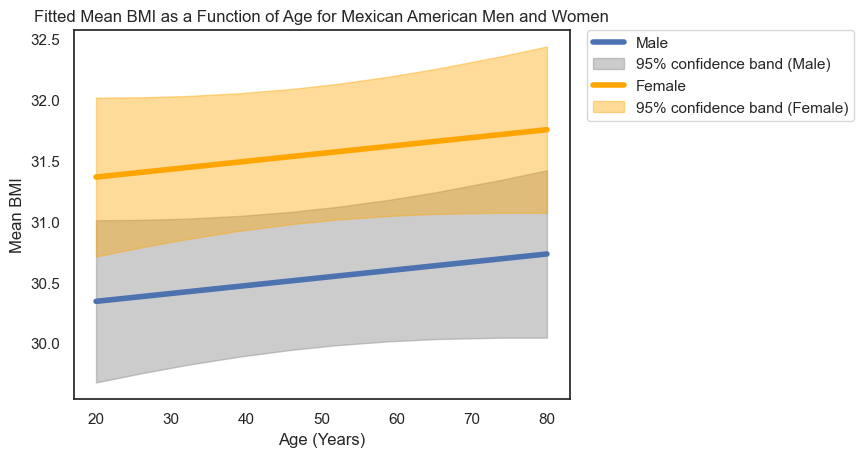

In [10]:
# Fix the variables needed for the prediction for Mexican American women
values_women = {"Gender": "Female", 
                "Race": "Mexican American"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr_women, cb_women, fv_women = predict_functional(multivariate_model, "RIDAGEYR", values=values_women, ci_method="simultaneous")

# Plot the fitted mean BMI as a function of age for Mexican American men and women on the same graph
sns.lineplot(x=fv, y=pr, lw=4, label="Male")
plt.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4, label="95% confidence band (Male)")

sns.lineplot(x=fv_women, y=pr_women, lw=4, label="Female", color='orange')
plt.fill_between(fv_women, cb_women[:, 0], cb_women[:, 1], color='orange', alpha=0.4, label="95% confidence band (Female)")

plt.xlabel('Age (Years)')
plt.ylabel('Mean BMI')
plt.legend(loc='upper left', bbox_to_anchor =(1.02, 1.02))
plt.title('Fitted Mean BMI as a Function of Age for Mexican American Men and Women');

**Answer:**

- Based on the plot of the mean BMI as a function of age for Mexican American men and women, it appears that the mean BMI for women is slightly higher than that for men throughout the observed age range. However, the confidence intervals for both groups overlap significantly, which means that we cannot make a definitive conclusion about the true difference in BMI between Mexican American men and women based on this data and model.

- The overlapping confidence intervals suggest that the observed differences in mean BMI between the two groups may not be statistically significant. In other words, we cannot confidently say that there is a true difference in BMI between Mexican American men and women based solely on this data.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

**Note:**
The term **"controlling for gender and ethnicity"** means that we are taking into account the effects of gender and ethnicity on BMI when we assess the relationship between BMI and age. This is important because gender and ethnicity can both be associated with BMI, and we want to make sure that we are not simply seeing an association between BMI and age that is actually due to gender or ethnicity.

For example, it is possible that men tend to have higher BMIs than women, and that Mexican Americans tend to have higher BMIs than other ethnic groups. If we do not control for gender and ethnicity, then we may see an association between BMI and age that is simply due to the fact that men and Mexican Americans tend to be older than women and other ethnic groups.

By controlling for gender and ethnicity, we can isolate the effect of age on BMI and get a more accurate estimate of the true relationship between the two variables.

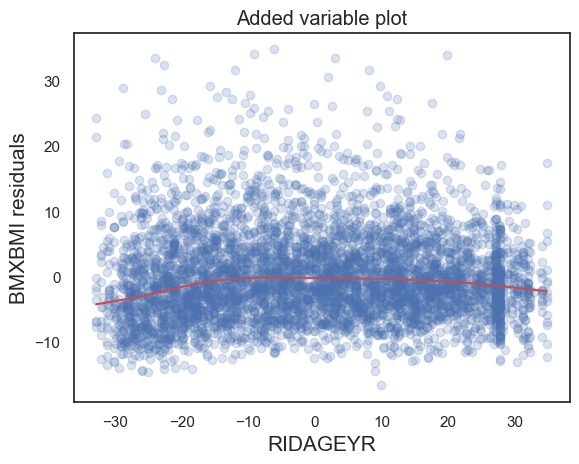

In [11]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess
from statsmodels.formula.api import glm

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
GLM = glm("BMXBMI ~ RIDAGEYR + C(Gender) + C(Race)", data=da)
glm_model = GLM.fit()
glm_model.summary()

fig = glm_model.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

**Answer:**

**The added variable plot** for age as a predictor of BMI reveals a potential nonlinearity in the relationship. The plot suggests that the relationship between age and BMI is not linear, but rather that it is slightly upward for the first 10 years or so of age, then begins to stay flat before decreasing in the last 10 years. This would imply that BMI increases slightly more slowly for people in their 20s and early 30s, then begins to stay flatter and decrease in the 70s to 80s.

The residuals in the plot are randomly distributed around the red line, which confirm we have control the Gender and Race factors that is affecting the relationship between age and BMI. The slope of the red line is not very steep, which suggests that the relationship between age and BMI is not very strong. However, the plot does suggest that there is a positive relationship between age and BMI, meaning that BMI tends to increase with age.

Further research is needed to confirm this finding and to understand the reasons for the nonlinearity in the relationship. However, the added variable plot provides a useful starting point for understanding the relationship between age and BMI.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [12]:
url = "nhanes_2015_2016.csv"
df = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["ALQ110", "RIDAGEYR", "RIAGENDR", "DMDEDUC2"]
df = df[vars]
df.head()

,ALQ110,RIDAGEYR,RIAGENDR,DMDEDUC2
0,NaN,62,1,5.0
1,NaN,53,1,3.0
2,NaN,78,1,3.0
3,1.0,56,2,5.0
4,1.0,42,2,4.0


In [13]:
df.shape

(5735, 4)

In [14]:
education_mapping = {
    1: "< 9th",
    2: "9-11th",
    3: "High school",
    4: "Some college",
    5: "College or above",
    7: np.nan,
    9: np.nan
}
# Use the map function to create a new categorical variable "Education"
df['Education'] = df['DMDEDUC2'].map(education_mapping).astype('category')

In [15]:
gender_mapping = {
    1: "Male",
    2: "Female"
}

# Use the map function to create a new categorical variable "Gender"
df['Gender'] = df['RIAGENDR'].map(gender_mapping).astype('category')

In [16]:
df['ALQ110'].isna().sum()

4004

In [17]:
drinking_mapping = {
    1: 1,
    2: 0,
    7: np.nan,
    9: np.nan
}

# Use the map() function to apply the renaming
df['Drinking'] = df['ALQ110'].map(drinking_mapping).astype('float')

In [18]:
df.head()

,ALQ110,RIDAGEYR,RIAGENDR,DMDEDUC2,Education,Gender,Drinking
0,NaN,62,1,5.0,College or above,Male,NaN
1,NaN,53,1,3.0,High school,Male,NaN
2,NaN,78,1,3.0,High school,Male,NaN
3,1.0,56,2,5.0,College or above,Female,1.0
4,1.0,42,2,4.0,Some college,Female,1.0


In [19]:
# Remove rows with 'Refused' and 'Don't Know' responses in the 'Education' column
df = df.dropna()

In [20]:
c = pd.crosstab(df['Gender'], df['Drinking']).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

Drinking,0.0,1.0,odds
Gender,,,
Female,0.550089,0.449911,0.817886
Male,0.541667,0.458333,0.846154


In [21]:
c["logodds"] = np.log(c.odds)
c

Drinking,0.0,1.0,odds,logodds
Gender,,,,
Female,0.550089,0.449911,0.817886,-0.201032
Male,0.541667,0.458333,0.846154,-0.167054


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

No, based on the log odds alone, it is not possible to say whether more than 50% of women drink alcohol. The log odds for women is -0.201032, which is less than 0. This means that the odds of a woman drinking alcohol are less than 1 and probability of drinking alcohol is less than 0.5 respectively.

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

The log odds for women and men are both less than 0, which means that the probability of drinking alcohol for both groups is less than 0.5. However, the log odds for women (-0.201032) are slightly lower than the log odds for men (-0.167054). This means that the odds of a woman drinking alcohol are slightly less than the odds of a man drinking alcohol.

However, the log odds alone do not take into account the sample size. If the sample size is large enough, then even a small difference in the log odds can be statistically significant. The sample size for this study is 1574, which is a large enough sample size to detect a small difference in the log odds.

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [22]:
from statsmodels.formula.api import logit

logit_formula = "Drinking ~ Gender" # Drinking must be 'float' for statsmodel to understand

unilogit_model = logit(formula = logit_formula, data=df)
unilogit = unilogit_model.fit()
unilogit.summary()

Optimization terminated successfully.
         Current function value: 0.688570
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Drinking   No. Observations:                 1574
Model:                          Logit   Df Residuals:                     1572
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:               4.277e-05
Time:                        19:44:06   Log-Likelihood:                -1083.8
converged:                       True   LL-Null:                       -1083.9
Covariance Type:            nonrobust   LLR p-value:                    0.7608
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2010      0.060     -3.344      0.001      -0.319      -0.083
Gender[T.Male]     0.0340      0.112      0.305      0.761      -0.185       0.253
==================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

Based on the logistic regression results, the p-value for the Gender variable Gender[T.Male] is 0.761, which is greater than the significance level of 0.05. This means that there is no statistically significant evidence to suggest that the drinking rate differs between women and men.

The coefficient for the Gender[T.Male] variable is 0.0340, but since the p-value is not statistically significant, we cannot confidently interpret this coefficient as evidence of a difference in drinking rates between women and men. In other words, the data does not provide enough evidence to conclude that there is a significant difference in the drinking rates between the two genders.

So the exponentiation of coefficient for the Gender[T.Male], 0.034, is 1.034. This means that the odds of smoking for a man are 3.4% higher than the odds of smoking for a woman.

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 7.

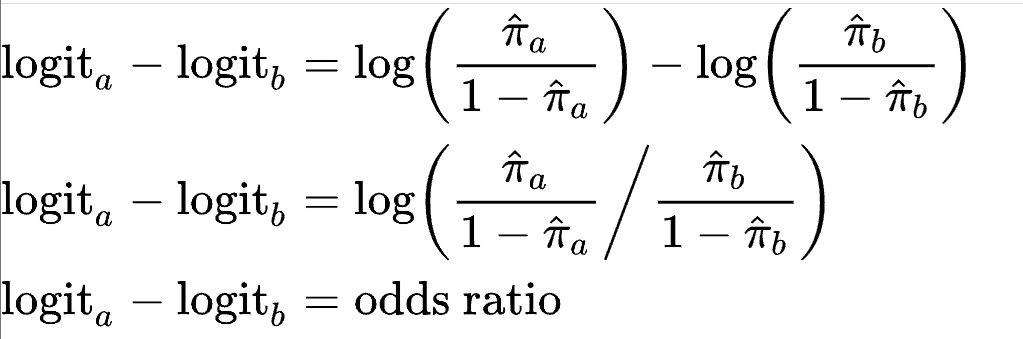


The log odds ratio between drinking and smoking can be calculated directly from the table in question 7 as follows:

```
Log odds ratio = (log odds for men - log odds for women) = (-0.167054 - (-0.201032)) = 0.034
```

The log odds ratio can also be calculated from the logistic regression results in question 8 as follows:

```
Log odds ratio = coefficient for Gender[T.Male] = 0.034
```

The two values are the same. This confirms that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 7.


## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [23]:
df.head()

,ALQ110,RIDAGEYR,RIAGENDR,DMDEDUC2,Education,Gender,Drinking
3,1.0,56,2,5.0,College or above,Female,1.0
4,1.0,42,2,4.0,Some college,Female,1.0
5,2.0,72,2,2.0,9-11th,Female,0.0
13,1.0,67,2,5.0,College or above,Female,1.0
19,2.0,54,2,4.0,Some college,Female,0.0


In [24]:
formula = "Drinking ~ RIDAGEYR + Gender + Education"

multivariate_logit_model = logit(formula=formula, data=df)
multilogit = multivariate_logit_model.fit()
multilogit.summary()

Optimization terminated successfully.
         Current function value: 0.673097
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Drinking   No. Observations:                 1574
Model:                          Logit   Df Residuals:                     1567
Method:                           MLE   Df Model:                            6
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:                 0.02251
Time:                        19:44:06   Log-Likelihood:                -1059.5
converged:                       True   LL-Null:                       -1083.9
Covariance Type:            nonrobust   LLR p-value:                 8.168e-09
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.9182      0.219     -4.200      0.000      -1.347      -0.490
Gender[T.Male]                    0.0172      0.114      0.151      0.880      -0.205       0.240
Education[T.< 9th]               -0.4087      0.194     -2.105      0.035      -0.789      -0.028
Education[T.College or above]     0.4886      0.182      2.681      0.007       0.131       0.846
Education[T.High school]          0.4013      0.184      2.179      0.029       0.040       0.762
Education[T.Some college]         0.5421      0.175      3.098      0.002       0.199       0.885
RIDAGEYR                          0.0086      0.003      2.951      0.003       0.003       0.014
=================================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

Based on the logistic regression output, the predictor variables that show a statistically significant association with drinking are:

1. `Education`: Specifically, the categories `< 9th`, `College or above`, `High school`, and `Some college` all show statistically significant associations with drinking. This means that individuals with different education levels have different likelihoods of drinking compared to the reference category (which is not explicitly stated in the output, but it is typically the category with the lowest value in an unordered categorical variable).

2. `Age (RIDAGEYR)`: Age also shows a statistically significant association with drinking. For each one-unit increase in age (year), the log odds of drinking increase significantly. In other words, the odds of drinking increase by approximately 0.86% for each additional year of age. (Percentage Change in Odds = exp(0.0086) = 1.008640797)

3. On the other hand, the predictor variable `Gender` (Male vs. Female) does not show a statistically significant association with drinking, as its p-value is greater than the significance level of 0.05. Therefore, we cannot conclude that gender has a meaningful effect on the likelihood of drinking based on the current model and data.

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

To calculate the odds of a college-educated, 50-year-old woman drinking, we can use the logistic regression equation:

`Log(odds) = Intercept + (coefficient for Gender[T.Male] * Gender[T.Male]) + (coefficient for Education[T.College or above] * Education[T.College or above]) + (coefficient for RIDAGEYR * 50)`

From the given logistic regression output:
- Intercept = -0.9182
- coefficient for Gender[T.Male] = 0.0172
- coefficient for Education[T.College or above] = 0.4886
- coefficient for RIDAGEYR = 0.0086

Let's plug these values into the equation:

- Log(odds) = -0.9182 + (0.0172 * 0) + (0.4886 * 1) + (0.0086 * 50)
- Log(odds) = -0.9182 + 0.4886 + 0.43
- Log(odds) = 0.0004

Now, we can convert the log(odds) back to odds using the exponential function:

- Odds = exp(0.0004)
- Odds = 1.0004

The odds of a college-educated, 50-year-old woman drinking (1.0004) are slightly higher than the odds of a woman in the population drinking (0.817886). This means that the college-educated, 50-year-old woman is slightly more likely to drink than a woman in the general population.

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

For college graduates:
- Odds = exp(0.4886) ≈ 1.630

For high school graduates (with no college):
- Odds = exp(0.4013) ≈ 1.4937

`Odds Ratio = Odds for College Graduates / Odds for High School Graduates = 1.623 / 1.4937 ≈ 1.086`

The odds ratio is approximately 1.091, which indicates that the odds of drinking are about 8,6% higher for college graduates compared to high school graduates (with no college), holding gender and age fixed based on the given data.

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

In the first logistic regression model, which only considered `Gender` as a predictor, the coefficient for gender was 0.0340. In the second logistic regression model, which included `Age` and `Education` along with `Gender` as predictors, the coefficient for gender changed to 0.0172.

Comparing these two coefficients, we can see that the parameter for gender did change when `Age` and `Education` were added to the model. However, the change was not substantial. The coefficient for gender decreased from 0.0340 to 0.0172, indicating that the association between `Gender` and `Drinking` became **slightly weaker** when accounting for Age and Education. 

The p-value for gender in the second model is also higher (0.880) compared to the first model (0.761), suggesting that the association between gender and drinking is weaker in the second model, after accounting for age and education. Therefore, we can conclude that the association between gender and drinking is not statistically significant in the second model. 

This suggests that the odds of a man drinking are not significantly different from the odds of a woman drinking, after accounting for age and education.

## Question 10:

Construct a CERES (Conditional Expectation of the Residuals) plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

Using `sm.GLM.from_formula`, we can `plot_ceres_residuals` while using `logit` we cannot

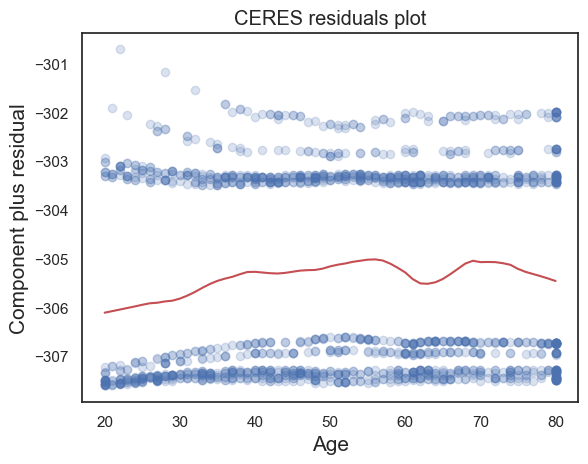

In [27]:
from statsmodels.graphics.regressionplots import add_lowess


model = sm.GLM.from_formula("Drinking ~ RIDAGEYR + Gender + Education", family=sm.families.Binomial(), data=df)
result = model.fit()
# result.summary()

fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)
ax.set_xlabel('Age');

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

The CERES plot is a graphical representation of the relationship between a continuous predictor variable and a binary outcome variable. It is used to assess the linearity of the relationship between the two variables. The plot for the relationship between `Age` and the log odds for `Drinking` shows a major non-linearity. The lowess plot shows that the log odds for `Drinking` do not follow a straight or linear trend as `Age` increases. Instead, the log odds seem to exhibit a non-linear pattern with fluctuations and varying slopes at different age intervals.

The plot suggests that the relationship between `Age` and the log odds for `Drinking` is more complex than a simple linear relationship. There are distinct periods where the log odds increase faster (e.g., between ages 20 and 55, and between ages 65 and 70) and periods of slower or minimal increase (e.g., between ages 55 and 65, and between ages 70 and 80). This indicates that the impact of age on the likelihood of drinking is not constant across all age groups.

The presence of major non-linearity in the relationship between `Age` and the log odds for `Drinking` highlights the need to consider more flexible modeling approaches that can capture these complex patterns and better understand how age influences drinking behavior in the population.